In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cyclistic-bike-share-2022-2024-clean/cyclistic_2022_2024_MASTER_CLEAN.csv


# 🚲 Cyclistic Bike Share-Visualization (2022/24)

This project analyzes and visualizes bike-sharing data from Cyclistic between 2022 and 2024 using Python.  
The goal is to explore ride trends, user behavior (members vs casuals), peak usage times, popular stations, and rideable types to generate business insights.

**Tools Used:**  
- Python  
- pandas  
- matplotlib  
- seaborn  
- numpy  

**Dataset:**  
Cyclistic Bike Share (2022–2024) — Cleaned Master File


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option("display.max_columns", None)

print("Libraries imported successfully!")


Libraries imported successfully!


In [3]:
file_path = "/kaggle/input/cyclistic-bike-share-2022-2024-clean/cyclistic_2022_2024_MASTER_CLEAN.csv"

df = pd.read_csv(
    file_path,
    low_memory=False,
    dtype_backend="numpy_nullable"
)

print("Data loaded successfully!")


Data loaded successfully!


In [4]:
df.shape


(13065124, 21)

In [5]:
df.head()


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length_min,year,month,day_of_week,hour,season,year_month,YearMonth
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.0128,-87.665906,42.01256,-87.674367,casual,2.95,2022,1,Thursday,11,Winter,2022-01,2022-01
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.01256,-87.674367,casual,4.35,2022,1,Monday,8,Winter,2022-01,2022-01
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.92533,-87.6658,member,4.35,2022,1,Tuesday,4,Winter,2022-01,2022-01
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,14.933333,2022,1,Tuesday,0,Winter,2022-01,2022-01
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.87785,-87.62408,41.884621,-87.627834,member,6.033333,2022,1,Thursday,1,Winter,2022-01,2022-01


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13065124 entries, 0 to 13065123
Data columns (total 21 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             string 
 1   rideable_type       string 
 2   started_at          string 
 3   ended_at            string 
 4   start_station_name  string 
 5   start_station_id    string 
 6   end_station_name    string 
 7   end_station_id      string 
 8   start_lat           Float64
 9   start_lng           Float64
 10  end_lat             Float64
 11  end_lng             Float64
 12  member_casual       string 
 13  ride_length_min     Float64
 14  year                Int64  
 15  month               Int64  
 16  day_of_week         string 
 17  hour                Int64  
 18  season              string 
 19  year_month          string 
 20  YearMonth           string 
dtypes: Float64(5), Int64(3), string(13)
memory usage: 2.1 GB


In [7]:
# Check missing values in key analysis columns
df[[
    "rideable_type", 
    "member_casual", 
    "start_station_name", 
    "end_station_name", 
    "ride_length_min",
    "year",
    "month",
    "hour"
]].isna().sum()


rideable_type         0
member_casual         0
start_station_name    0
end_station_name      0
ride_length_min       0
year                  0
month                 0
hour                  0
dtype: int64

In [8]:
# Total rides
total_rides = len(df)

# Member vs Casual count
user_counts = df["member_casual"].value_counts()

total_rides, user_counts


(13065124,
 member_casual
 member    8179619
 casual    4885505
 Name: count, dtype: Int64)

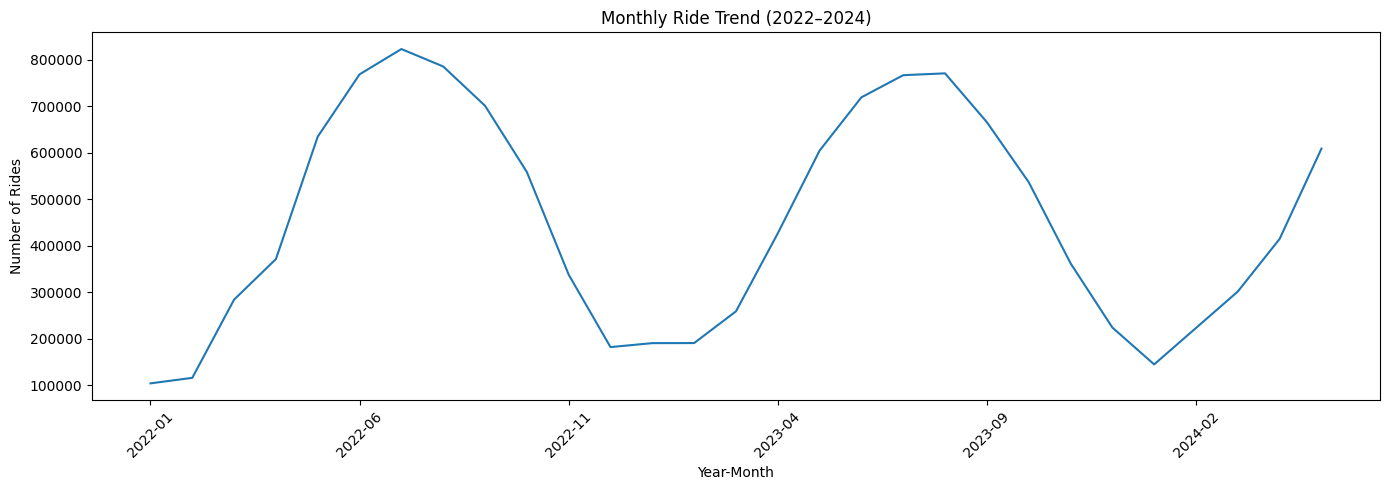

In [9]:
# Monthly ride trend
monthly_trend = df["year_month"].value_counts().sort_index()

plt.figure(figsize=(14, 5))
monthly_trend.plot()
plt.title("Monthly Ride Trend (2022–2024)")
plt.xlabel("Year-Month")
plt.ylabel("Number of Rides")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


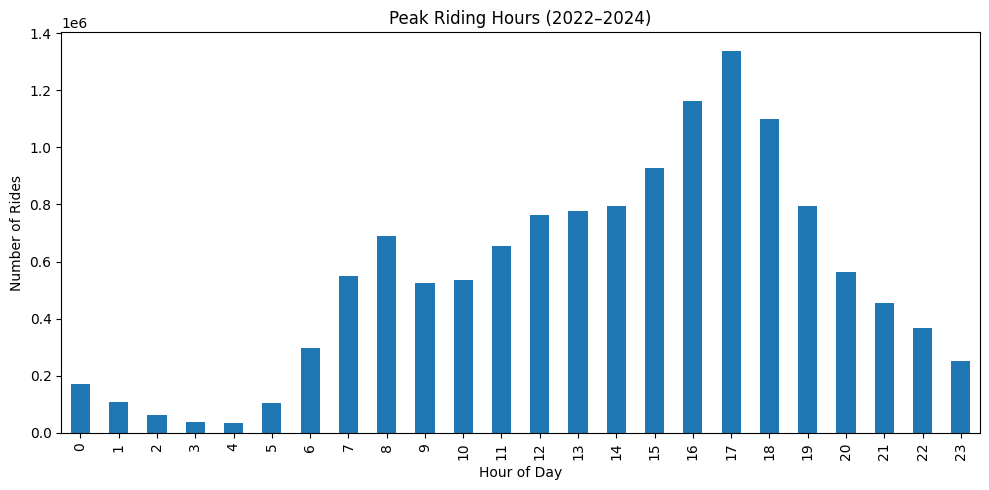

In [10]:
# Peak riding hours
hourly_trend = df["hour"].value_counts().sort_index()

plt.figure(figsize=(10, 5))
hourly_trend.plot(kind="bar")
plt.title("Peak Riding Hours (2022–2024)")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Rides")
plt.tight_layout()
plt.show()


📌 **Insight:**  
Ride volume shows clear seasonal patterns with higher usage during mid-year (summer months) and lower activity during winter, indicating strong weather dependence.

📌 **Insight:**  
Ride demand peaks during commuting hours, indicating that bikes are heavily used for work-related travel.


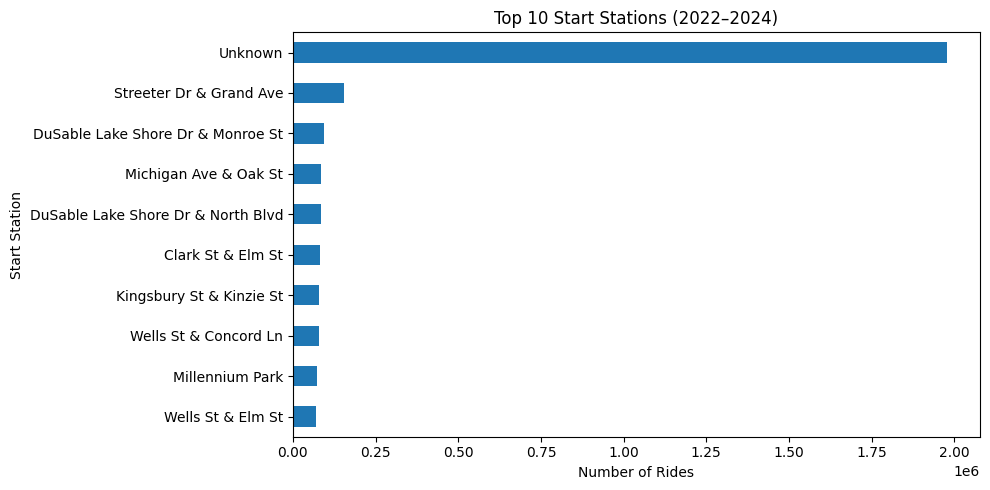

In [11]:
# Top 10 Start Stations
top_start_stations = df["start_station_name"].value_counts().head(10)

plt.figure(figsize=(10, 5))
top_start_stations.sort_values().plot(kind="barh")
plt.title("Top 10 Start Stations (2022–2024)")
plt.xlabel("Number of Rides")
plt.ylabel("Start Station")
plt.tight_layout()
plt.show()


📌 **Insight:**  
A small number of stations account for a large share of trip starts, suggesting high-demand hotspots that require frequent bike rebalancing.


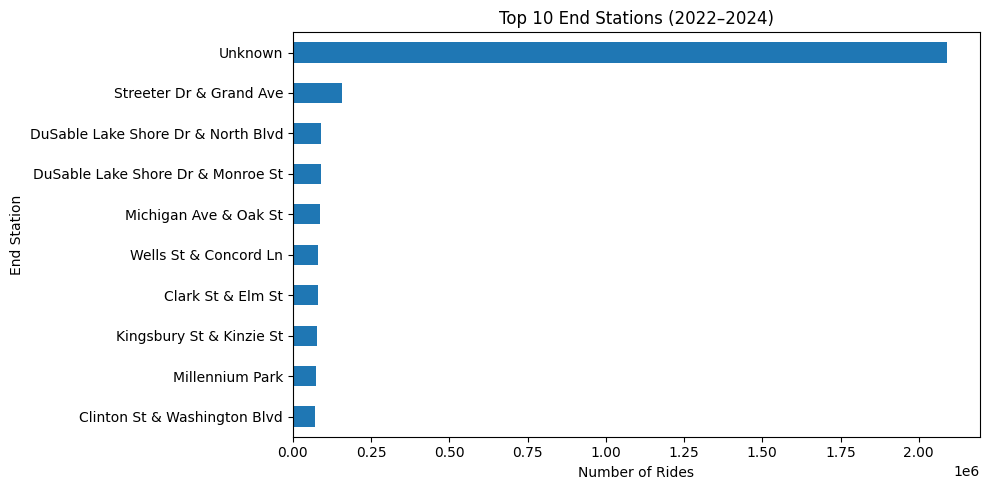

In [12]:
# Top 10 End Stations
top_end_stations = df["end_station_name"].value_counts().head(10)

plt.figure(figsize=(10, 5))
top_end_stations.sort_values().plot(kind="barh")
plt.title("Top 10 End Stations (2022–2024)")
plt.xlabel("Number of Rides")
plt.ylabel("End Station")
plt.tight_layout()
plt.show()


📌 **Insight:**  
End stations closely match high-demand start locations, indicating consistent commuting and return travel patterns.


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
file_path = "/kaggle/input/cyclistic-bike-share-2022-2024-clean/cyclistic_2022_2024_MASTER_CLEAN.csv"

df = pd.read_csv(
    file_path,
    low_memory=False,
    dtype_backend="numpy_nullable"
)


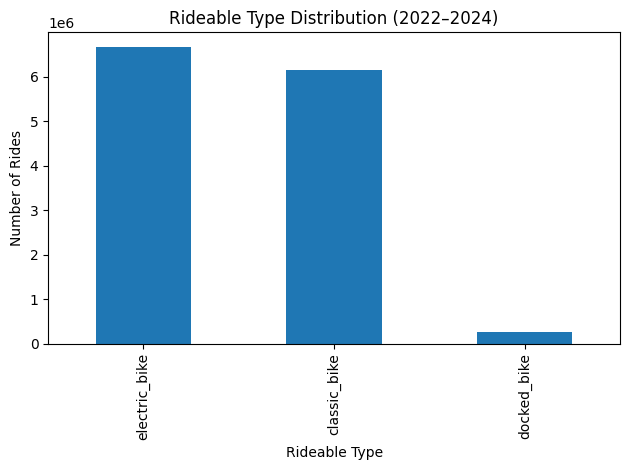

In [15]:
rideable_counts = df["rideable_type"].value_counts()

plt.figure()
rideable_counts.plot(kind="bar")
plt.title("Rideable Type Distribution (2022–2024)")
plt.xlabel("Rideable Type")
plt.ylabel("Number of Rides")
plt.tight_layout()
plt.show()


📌 **Insight:**  
Electric bikes are the most preferred rideable type, indicating a strong user shift toward convenience and assisted cycling over traditional bikes.


<Figure size 1000x500 with 0 Axes>

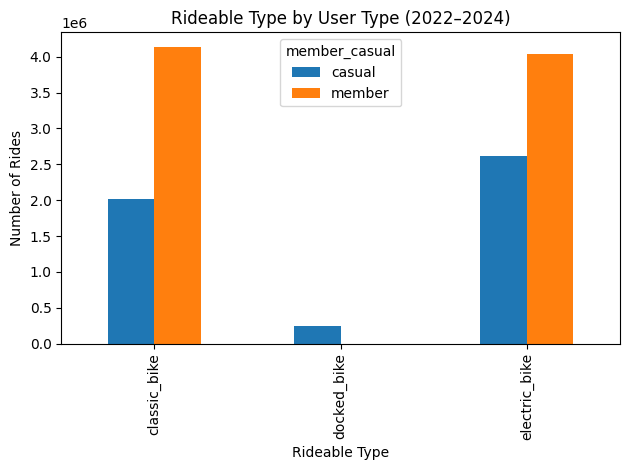

In [16]:
rideable_user = pd.crosstab(df["rideable_type"], df["member_casual"])

plt.figure(figsize=(10, 5))
rideable_user.plot(kind="bar")
plt.title("Rideable Type by User Type (2022–2024)")
plt.xlabel("Rideable Type")
plt.ylabel("Number of Rides")
plt.tight_layout()
plt.show()


📌 **Insight:**  
Members primarily use electric and classic bikes for daily commuting, while casual users show a stronger preference for electric bikes during leisure rides.


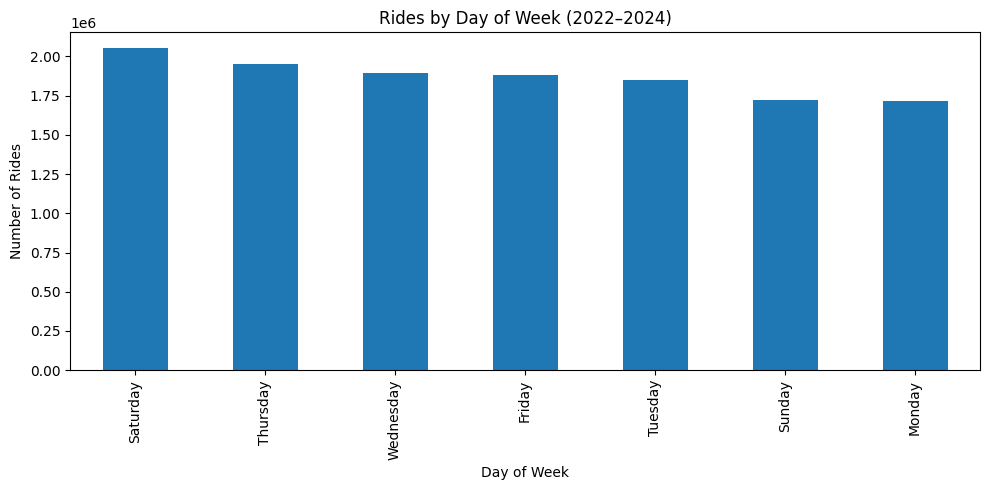

In [17]:
weekday_trend = df["day_of_week"].value_counts()

plt.figure(figsize=(10, 5))
weekday_trend.plot(kind="bar")
plt.title("Rides by Day of Week (2022–2024)")
plt.xlabel("Day of Week")
plt.ylabel("Number of Rides")
plt.tight_layout()
plt.show()


📌 **Insight:**  
Ride activity is higher on weekdays, confirming that Cyclistic bikes are widely used for commuting rather than only for recreational purposes.


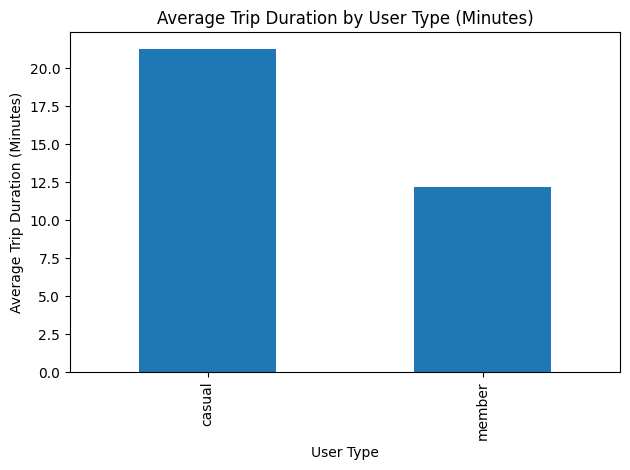

In [18]:
avg_duration = df.groupby("member_casual")["ride_length_min"].mean()

plt.figure()
avg_duration.plot(kind="bar")
plt.title("Average Trip Duration by User Type (Minutes)")
plt.xlabel("User Type")
plt.ylabel("Average Trip Duration (Minutes)")
plt.tight_layout()
plt.show()


📌 **Insight:**  
Casual riders take longer trips on average, reflecting leisure behavior, while members take shorter and more frequent trips for daily commutes.


## 📊 Key Business Insights

1. Ride activity shows strong seasonality, with peak demand during mid-year (summer months) and reduced usage in winter.
2. Bike demand is highest during daily commuting hours, indicating that a large portion of users rely on Cyclistic for work-related travel.
3. A small group of start and end stations generates a large share of total rides, highlighting critical demand hotspots.
4. Electric bikes are the most popular rideable type, showing a clear user preference for assisted cycling.
5. Members account for the majority of total rides, but casual users still represent a significant portion of system usage.
6. Casual riders take significantly longer trips on average than members, indicating leisure-focused usage.
7. Weekday ride volume is higher than weekends, confirming that Cyclistic is primarily used for commuting.


## 💡 Business Recommendations

1. Increase the number of electric bikes at high-demand stations to meet growing user preference.
2. Focus bike rebalancing operations on the top start and end stations to reduce stock shortages.
3. Introduce targeted membership promotions for frequent casual riders to convert them into long-term members.
4. Optimize maintenance schedules during low-demand late-night hours to improve fleet availability during peak hours.
5. Launch seasonal marketing campaigns during spring and summer when ride demand naturally increases.


## ✅ Project Summary

This project analyzed over 13 million Cyclistic bike-share rides from 2022 to 2024 using Python.  
Through data visualization and behavioral analysis, key usage patterns, user segmentation, seasonal trends, and operational hotspots were identified.

The analysis provides actionable insights to improve:
- Bike availability
- Membership conversion
- Fleet management
- Marketing strategy

This project demonstrates real-world data analytics skills including data handling with pandas, visualization with matplotlib, and business-driven insight generation.
